In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import get_codeup_data
from wrangle import combine_codeup_data
from wrangle import null_filler

# ACQUIRE
I will acquire the data for this project using __get_codeup_data__ function from my __wrangle.py__ file.
***

In [2]:
# using function to acquire data
logs, cohorts = get_codeup_data()

In [3]:
# previewing logs data
logs.head(2)

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [4]:
# previewing cohorts data
cohorts.head(2)

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1


# PREPARE
I will prepare the data for the exploration necessary to answer the various questions I was asked.
***

### Combine the data from the two separate DFs using the __combine_codeup_data__ function from my __wrangle.py__ file.

In [5]:
# combining DFs using function from local wrangle.py file
df = combine_codeup_data(logs, cohorts)

In [6]:
# previewing data 
df.head()

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


### I'm going to use .info to check if the column data types are appropriate and if there are any null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719458 non-null  object 
 1   user_id      719459 non-null  int64  
 2   cohort_id    674619 non-null  float64
 3   ip           719459 non-null  object 
 4   name         674619 non-null  object 
 5   start_date   674619 non-null  object 
 6   end_date     674619 non-null  object 
 7   program_id   674619 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 49.4+ MB


- __Update data types if necessary for later work__
- Update missing values with special values that distinguish them from non-nulls
    - page_viewed: PageUnknown
    - cohort_id: 0
    - name: unknown
    - start_date and end_date: 99-99-9999
    - program_id: 0

### I'm going to use my null_filler function from my wrangle.py file to fill null values with the values specified above.

In [8]:
# Using function from wrangle file to fill null values
null_filler(df)

In [9]:
# Checking to confirm if all nulls are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719459 non-null  object 
 1   user_id      719459 non-null  int64  
 2   cohort_id    719459 non-null  object 
 3   ip           719459 non-null  object 
 4   name         719459 non-null  object 
 5   start_date   719459 non-null  object 
 6   end_date     719459 non-null  object 
 7   program_id   719459 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 49.4+ MB


### I'm going to split the data science, web development, and unknown cohorts into separate DFs to make exploring them separately easier.

First I'll need to identify which program IDs belong with web development and which belong to data science.

I'll do this by cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF and take note of their program IDs.

In [10]:
# filtering for an Andromeda cohort row to see what program ID it is associated with
df[df.name == 'Andromeda'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2.0


Andromeda is a web dev cohort.

program_id 2 indicates a web dev cohort.

In [11]:
# filtering for an Arches cohort row to see what program ID it is associated with
df[df.name == 'Arches'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 10:14:47,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0


Arches is a web dev cohort.

program_id 1 indicates a web dev cohort.

In [12]:
# filtering for an Apollo cohort row to see what program ID it is associated with
df[df.name == 'Apollo'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-03-22 19:01:49,/,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0


Apollo is a web dev cohort.

program_id 4 indicates a web dev cohort.

In [13]:
# filtering for a Darden cohort row to see what program ID it is associated with
df[df.name == 'Darden'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:34:44,/,678,59,76.201.20.193,Darden,2020-07-13,2021-01-12,3.0


Darden is a web dev cohort.

Program_id 3 indicates a Data Science cohort.

### After cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF, I was able to determine that
 - Web development cohorts correspond with program IDs 1, 2 and 4
 - Data science cohorts correspond with program ID 3

### Now that I know what program IDs correspond to web dev and DS cohorts, I can split them accordingly.

In [14]:
# creating web dev DF 
# a "staff" cohort was found during exploration, removing from WD data frame
wd = df[(df.program_id == 1) | ((df.program_id == 2) & (df.name != 'Staff')) | (df.program_id == 4)]

# creating data science DF
ds = df[df.program_id == 3]

# creating DF for unknown cohort rows
unk = df[df.program_id == 0]

## Prepare Takeaways
- Data prepared for exploration via
    - Merging data from separate source files
    - Filling null values
    - Splitting complete data frame into separate cohort data frames
        - web development
        - data science
        - unknown cohort
            - If time permits, I will return to the unknown cohort DF and attempt to decipher if any of its users belong in the web dev or DS dataframes so that their data can be used in exploration

# EXPLORE
I'm going to explore the data in order to answer the various questions I was presented with.
***

## Question 1 - Which lesson appears to attract the most traffic consistently across cohorts?

I'm going to answer this by creating a DF that shows the average amount of times each page was viewed by each cohort. I'll then sort the values by the average number of views and identify the top 3 most popular lessons.

### Q1 -  Web Development

In [15]:
# creating a crosstab of page_viewed and cohort name
wd_avg_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_avg_views['avg_views_per_cohort'] = wd_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
wd_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,723.194444
toc,355.333333
javascript-i,351.083333
search/search_index.json,310.416667
java-iii,269.500000
html-css,260.722222
java-ii,252.000000
spring,244.027778
jquery,228.638889


### Q1 - Web Development - Answer 

The most visited lesson page on average across all web development cohorts is __<ins>Javascript-I</ins>__
    
Note: The top page, " / ", was not counted since it's not a lesson.

### Q1 - Data Science

In [16]:
# creating a crosstab of page_viewed and cohort name
ds_avg_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_avg_views['avg_views_per_cohort'] = ds_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
ds_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,1802.000000
1-fundamentals/modern-data-scientist.jpg,521.000000
1-fundamentals/AI-ML-DL-timeline.jpg,519.666667
1-fundamentals/1.1-intro-to-data-science,512.000000
search/search_index.json,443.666667
6-regression/1-overview,374.333333
classification/overview,286.666667
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,248.333333
10-anomaly-detection/1-overview,247.333333


### Q1 - Data Science - Answer

The lesson page with the most views on average across all data science cohorts is __<ins>1-fundamentals/1.1-intro-to-data-science</ins>__.
    
Note: The top page, " / ", was not counted since it's not a lesson.

## Question 2 -  Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 
explanation##################

### Q2 - Web Development

In [17]:
# creating a crosstab of page_viewed and cohort name
wd_sum_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_sum_views['sum_views_per_cohort'] = wd_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
wd_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_sum_views[['sum_views_per_cohort']].head(15)

name,sum_views_per_cohort
page_viewed,
/,26035
toc,12792
javascript-i,12639
search/search_index.json,11175
java-iii,9702
html-css,9386
java-ii,9072
spring,8785
jquery,8231


In [18]:
high_wd_view_cols = ['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring']

wd_popular_lesson_views = wd[wd.page_viewed.isin(high_wd_view_cols)]

wd_popular_lesson_views

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 10:00:39,javascript-i,6,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:14:51,javascript-i,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:23,javascript-i,6,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:18:24,spring,10,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0
...,...,...,...,...,...,...,...,...
2020-11-02 15:42:05,java-iii,733,61,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:04:19,java-iii,733,61,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:13:52,java-iii,747,61,70.125.129.102,Bash,2020-07-20,2021-01-21,2.0


In [19]:
wd_popular_lesson_views_ct = pd.crosstab(wd_popular_lesson_views.name, wd_popular_lesson_views.page_viewed)

wd_popular_lesson_views_ct.head()

page_viewed,html-css,java-ii,java-iii,javascript-i,spring
name,,,,,
Andromeda,372,395,430,509,485
Apex,708,595,616,610,572
Arches,215,167,153,294,192
Badlands,2,0,0,1,0
Bash,214,190,72,319,29


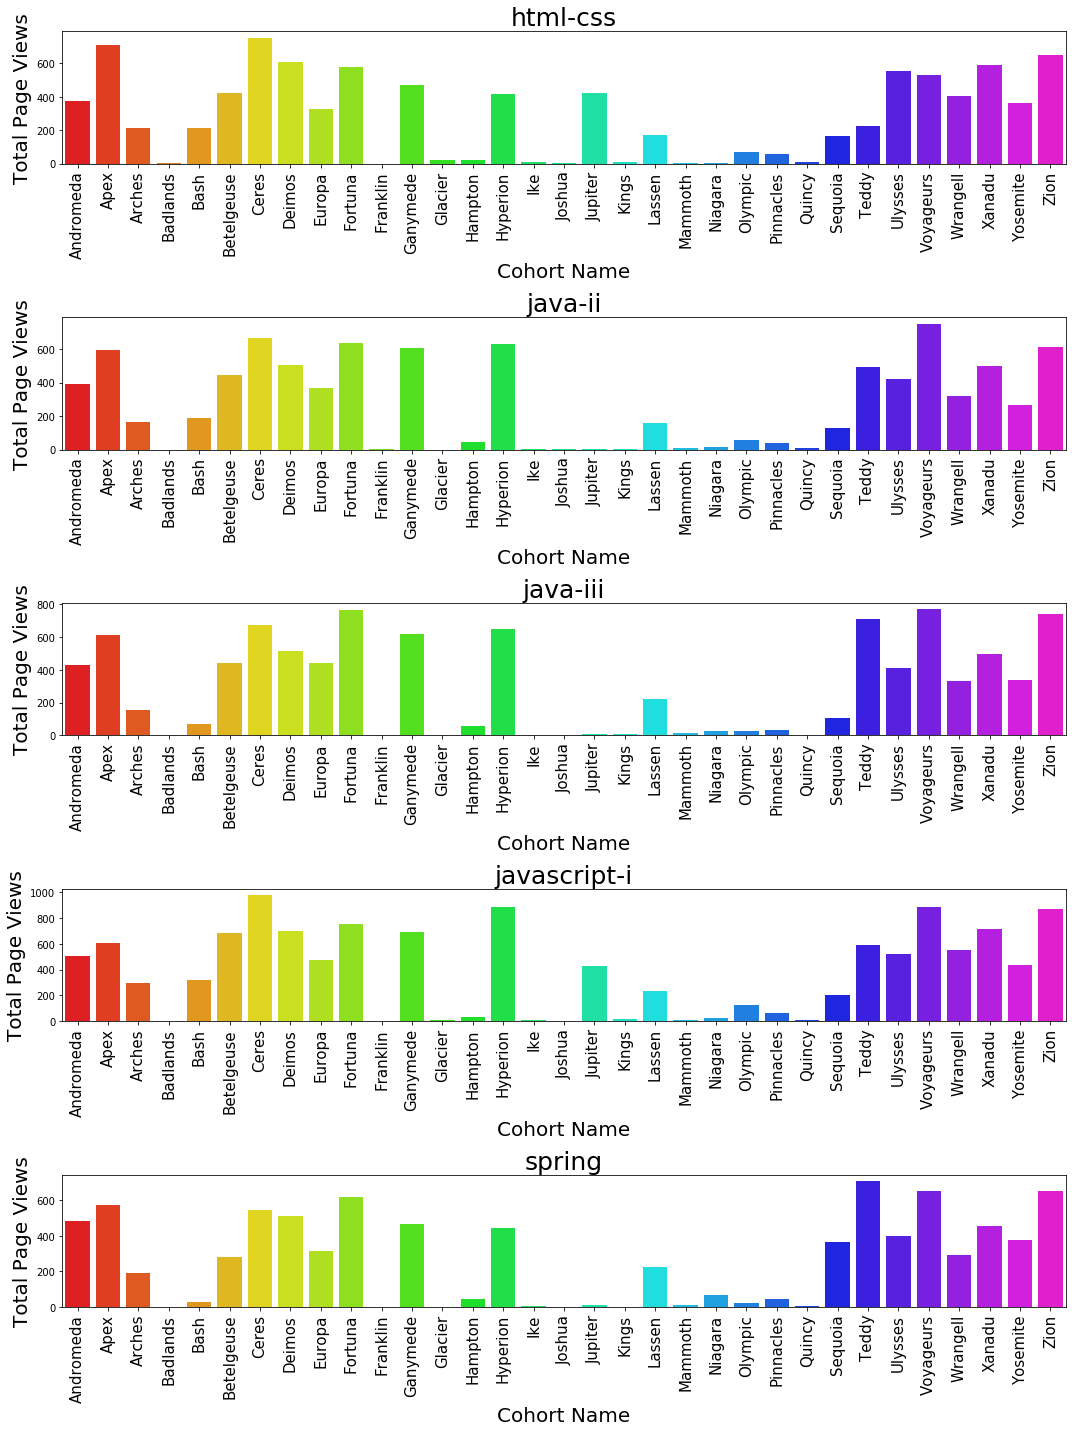

In [52]:
x = 1
plt.figure(figsize=(15,20))

for col in wd_popular_lesson_views_ct.columns:
    plt.subplot(5,1,x)
    x = x + 1
    sns.barplot(x = wd_popular_lesson_views_ct.index, y = wd_popular_lesson_views_ct[col], palette='gist_rainbow')
    plt.xticks(rotation=90, fontsize = 15)
    plt.title(col,fontsize = 25)
    plt.xlabel('Cohort Name', fontsize = 20)
    plt.ylabel('Total Page Views', fontsize = 20)
    
plt.tight_layout()

### Q2 - Web Development - Answer

No?

### Q2 - Data Science

In [21]:
# creating a crosstab of page_viewed and cohort name
ds_sum_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_sum_views['sum_views_per_cohort'] = ds_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
ds_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_sum_views[['sum_views_per_cohort']].head(10)

name,sum_views_per_cohort
page_viewed,
/,5406
1-fundamentals/modern-data-scientist.jpg,1563
1-fundamentals/AI-ML-DL-timeline.jpg,1559
1-fundamentals/1.1-intro-to-data-science,1536
search/search_index.json,1331
6-regression/1-overview,1123
classification/overview,860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,745
10-anomaly-detection/1-overview,742


In [22]:
high_ds_view_cols = ['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview', 'classification/overview', '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview']

ds_popular_lesson_views = ds[ds.page_viewed.isin(high_ds_view_cols)]

ds_popular_lesson_views

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:42:10,1-fundamentals/1.1-intro-to-data-science,472,34,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2020-11-02 13:37:41,classification/overview,685,59,99.76.233.212,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 13:42:46,classification/overview,696,59,67.11.85.236,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:20:32,classification/overview,685,59,99.76.233.212,Darden,2020-07-13,2021-01-12,3.0


In [23]:
ds_popular_lesson_views_ct = pd.crosstab(ds_popular_lesson_views.name, ds_popular_lesson_views.page_viewed)

ds_popular_lesson_views_ct.head()

page_viewed,1-fundamentals/1.1-intro-to-data-science,10-anomaly-detection/1-overview,3-sql/1-mysql-overview,6-regression/1-overview,classification/overview
name,,,,,
Bayes,615,383,142,521,10
Curie,461,345,441,595,91
Darden,460,14,121,7,759


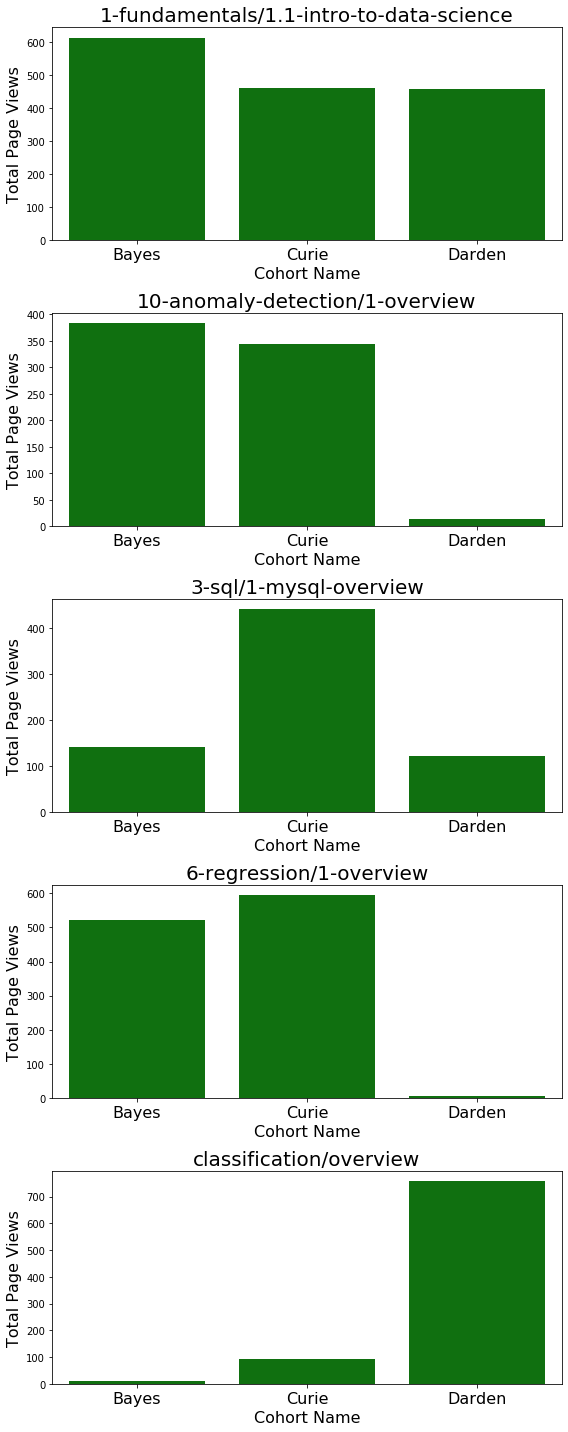

In [46]:
x = 1
plt.figure(figsize=(8,20))

for col in ds_popular_lesson_views_ct.columns:
    plt.subplot(5,1,x)
    x = x + 1
    sns.barplot(x = ds_popular_lesson_views_ct.index, y = ds_popular_lesson_views_ct[col],color='Green')
    plt.xticks(fontsize = 16)
    plt.title(col, fontsize = 20)
    plt.xlabel('Cohort Name', fontsize = 16)
    plt.ylabel('Total Page Views', fontsize = 16)
    
plt.tight_layout()

### Q2 - Data Science - Answer

I found 2 pages that were visited significantly more by one cohort than the others.
- __Curie__ visited the __SQL overview__ page roughly 300 more times than Darden or Bayes
- __Darden__ visited the __classification overview__ page roughly 600 more times than Curie or Bayes

 ## Question 3 - Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

### Q3 - Web Development

### Q3 - Data Science

 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 
 5. At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 
 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)? 
 7. Which lessons are least accessed? 
 8. Anything else I should be aware of? 